# Setting up MV

In [47]:
from model.master_transmuter import *
from scrape.scraper import *
import query
import unit_tests

In [4]:
import pandas as pd
import numpy as np

In [5]:
mythic_df = pd.read_csv("data/all_vintage_cards-mythic_recent.csv")
rare_df = pd.read_csv("data/all_vintage_cards-rare_recent.csv")
print('Mythic cards: {}'.format(mythic_df.shape[0]))
print('Rare cards: {}'.format(rare_df.shape[0]))

Mythic cards: 1846
Rare cards: 12588


In [6]:
mythic_df.sample(10)

,Unnamed: 0,id,name,set_name,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities,recent_date,recent_price
1550,17461,5bfcfb4e-1d1a-49b2-810c-cdcde29a3bcf,Serra Avatar,Duels of the Planeswalkers Promos 2012,Creature — Avatar,{4}{W}{W}{W},mythic,Serra Avatar's power and toughness are each eq...,*,*,NaN,7.0,pdp12,['W'],['W'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1428,15367,fcdbb062-0b0b-4b4c-b4db-dd149f744baa,Ral Zarek,Dragon's Maze,Legendary Planeswalker — Ral,{2}{U}{R},mythic,"+1: Tap target permanent, then untap another t...",NaN,NaN,4,4.0,dgm,"['R', 'U']","['R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1287,13517,a01f829b-22aa-4988-9698-5e1ebceb1dd8,Scourge of the Throne,Conspiracy,Creature — Dragon,{4}{R}{R},mythic,Flying\r\r\nDethrone (Whenever this creature a...,5,5,NaN,6.0,cns,['R'],['R'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542057e+12,17.4
0,0,ff92804a-0c62-4eb8-bbba-f1ca6f426b6e,"Urborg, Tomb of Yawgmoth",Ultimate Box Topper,Legendary Land,NaN,mythic,Each land is a Swamp in addition to its other ...,NaN,NaN,NaN,0.0,puma,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1551,17462,fa3fc5bf-f20c-47d3-8bbe-4c1c774074fb,Primordial Hydra,Duels of the Planeswalkers Promos 2012,Creature — Hydra,{X}{G}{G},mythic,Primordial Hydra enters the battlefield with X...,0,0,NaN,2.0,pdp12,['G'],['G'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1650,18912,5d393da0-4cb6-4ae8-b747-8e6d0fa7f55a,"Thrun, the Last Troll",Mirrodin Besieged,Legendary Creature — Troll Shaman,{2}{G}{G},mythic,This spell can't be countered.\r\r\nHexproof (...,4,4,NaN,4.0,mbs,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,3.9
345,3714,b9236e45-3d4f-4d4a-9882-3a6f99dd1ead,"Vona, Butcher of Magan",Ixalan Promos,Legendary Creature — Vampire Knight,{3}{W}{B},mythic,"Vigilance, lifelink\r\r\n{T}, Pay 7 life: Dest...",4,4,NaN,5.0,pxln,"['B', 'W']","['B', 'W']",True,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",NaN,NaN
199,1949,ab8935b1-ec87-4330-9952-9ef8cd344531,"Grothama, All-Devouring",Battlebond,Legendary Creature — Wurm,{3}{G}{G},mythic,"Other creatures have ""Whenever this creature a...",10,8,NaN,5.0,bbd,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
991,9715,a49e324f-8727-4ab5-aa76-c3c3c8725602,Eye of Ugin,Zendikar Expeditions,Legendary Land,NaN,mythic,Colorless Eldrazi spells you cast cost {2} les...,NaN,NaN,NaN,0.0,exp,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
34,34,7b821fbd-5186-45bd-b154-176a1436d24d,Temporal Manipulation,Ultimate Box Topper,Sorcery,{3}{U}{U},mythic,Take an extra turn after this one.,NaN,NaN,NaN,5.0,puma,['U'],['U'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN


In [10]:
clean_mythic_df = mythic_df[~pd.isnull(mythic_df['recent_price'])]
clean_rare_df = rare_df[~pd.isnull(rare_df['recent_price'])]

4209

In [12]:
clean_mythic_df.describe()

,Unnamed: 0,cmc,recent_date,recent_price
count,568.000000,568.000000,5.680000e+02,568.000000
mean,10684.330986,4.554577,1.539819e+12,27.059331
std,5621.492690,2.336848,4.992627e+09,62.099935
min,2028.000000,0.000000,1.523362e+12,0.200000
25%,6726.750000,3.000000,1.542027e+12,1.200000
50%,9724.500000,5.000000,1.542058e+12,3.900000
75%,14514.750000,6.000000,1.542087e+12,10.000000
max,22730.000000,12.000000,1.542101e+12,450.000000


In [13]:
clean_rare_df.describe()

,Unnamed: 0,loyalty,cmc,recent_date,recent_price
count,4209.000000,4.000000,4209.000000,4.209000e+03,4209.000000
mean,22614.140413,4.500000,3.925873,1.540245e+12,4.929746
std,11004.884816,1.290994,2.060219,5.835097e+09,18.128020
min,2023.000000,3.000000,0.000000,1.441591e+12,0.100000
25%,12307.000000,3.750000,3.000000,1.542026e+12,0.400000
50%,24958.000000,4.500000,4.000000,1.542084e+12,1.800000
75%,31622.000000,5.250000,5.000000,1.542096e+12,3.300000
max,39782.000000,6.000000,16.000000,1.542108e+12,323.200000


## Price EDA

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

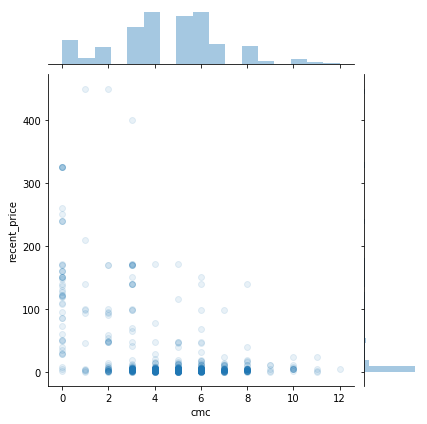

In [44]:
sns.jointplot(clean_mythic_df['cmc'], clean_mythic_df['recent_price'], joint_kws={'alpha':0.1})

(0, 80)

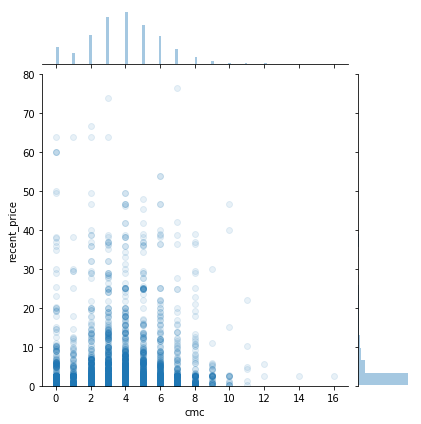

In [45]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['recent_price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})
plt.ylim(0,80)

(0, 80)

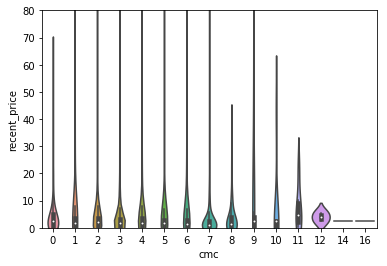

In [43]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['recent_price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})

### Feature Engineering

In [70]:
aberrant_researcher = CreatureFeatureTransformer()

In [71]:
perfected_form = aberrant_researcher.transform(clean_rare_df)

In [72]:
perfected_form.sample()

,Unnamed: 0,id,name,set_name,type_line,mana_cost,rarity,oracle_text,power,toughness,...,recent_date,recent_price,pt_type,p:t,p+t,p*t,sqrt_pt,avg_pt,cmc:p+t,cmc:p*t
3716,11905,1b92959c-0995-4bcc-b937-fc272c4540e9,Sphinx of Magosi,Commander 2014,Creature — Sphinx,{3}{U}{U}{U},rare,"Flying\n{2}{U}: Draw a card, then put a +1/+1 ...",6,6,...,1.542089e+12,1.3,static,1,12,36,6.000000,6,0.5,1.000000
6849,23680,82a2e219-9e84-4f54-88e2-3925e48c4827,Kinsbaile Borderguard,Morningtide,Creature — Kithkin Soldier,{1}{W}{W},rare,Kinsbaile Borderguard enters the battlefield w...,1,1,...,1.542096e+12,0.1,static,1,2,1,1.000000,1,1.5,3.000000
8155,27430,98d3bc63-8814-46e7-a6ee-dd5b94a8257e,"Tatsumasa, the Dragon's Fang",Champions of Kamigawa,Legendary Artifact — Equipment,{6},rare,"Equipped creature gets +5/+5.\n{6}, Exile Tats...",NaN,NaN,...,1.542096e+12,0.5,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11266,37630,0c9ea118-6a19-4e1b-aa5a-9b2729efc096,Vexing Arcanix,Ice Age,Artifact,{4},rare,"{3}, {T}: Target player chooses a card name, t...",NaN,NaN,...,1.542096e+12,2.5,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7604,25764,063bb28b-5e32-4f31-a208-16b653edf413,Panglacial Wurm,Coldsnap,Creature — Wurm,{5}{G}{G},rare,"Trample\nWhile you're searching your library, ...",9,5,...,1.542096e+12,13.9,static,1.8,14,45,6.708204,7,0.5,1.043498
6205,21391,1af1844a-601a-48c1-bf96-921d2d2e2aa1,Conqueror's Pledge,Zendikar,Sorcery,{2}{W}{W}{W},rare,Kicker {6} (You may pay an additional {6} as y...,NaN,NaN,...,1.512461e+12,45.5,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9168,30706,ae3dffe7-ecaf-4cf0-a43e-8e2746282992,Penumbra Wurm,Apocalypse,Creature — Wurm,{5}{G}{G},rare,"Trample\nWhen Penumbra Wurm dies, create a 6/6...",6,6,...,1.528272e+12,4.7,static,1,12,36,6.000000,6,0.583333,1.166667
3717,11906,1304a4e9-fd62-4b97-b652-b4ebc0f6ebe8,Sphinx of Jwar Isle,Commander 2014,Creature — Sphinx,{4}{U}{U},rare,Flying\nShroud (This creature can't be the tar...,5,5,...,1.542089e+12,1.3,static,1,10,25,5.000000,5,0.6,1.200000
7641,25895,c390e074-bd30-4564-a39a-176af7df79f4,Walking Archive,Dissension,Artifact Creature — Golem,{3},rare,Defender (This creature can't attack.)\nWalkin...,1,1,...,1.542096e+12,1.0,static,1,2,1,1.000000,1,1.5,3.000000
2991,9243,98e2d3e2-6128-46ec-9730-a278e703059b,Silent Sentinel,Commander 2015,Creature — Archon,{5}{W}{W},rare,"Flying\nWhenever Silent Sentinel attacks, you ...",4,6,...,1.542048e+12,0.2,static,0.666667,10,24,4.898979,5,0.7,1.428869


In [67]:
math.sqrt(clean_rare_df[clean_rare_df['toughness']=='1']['toughness'].astype(int))

TypeError: cannot convert the series to <class 'float'>